#UNIR
#Proyecto Final de Maestría
##Maestría en Análisis y Visualización de Datos

---
Carlos Enrique Loza Zavala

----

###Segmentación de clientes:

Carga de bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn import metrics
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from math import pi

Lectura del dataset:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/earandir/proyectofm/main/users_full.csv');

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,20468.0,2021.650967,0.663437,2020.0,2022.0,2022.0,2022.0,2022.0
sys,20468.0,4.180379,5.260405,1.0,2.0,3.0,6.0,284.0
fis,20468.0,1.285372,1.683139,1.0,1.0,1.0,1.0,132.0
per,20468.0,10.298857,20.669099,1.0,2.0,4.0,12.0,900.0
ad,20468.0,164.363885,1431.535313,0.0,0.0,0.0,0.0,49500.0
co,20468.0,3224.483584,5613.648470,0.0,0.0,0.0,6130.0,196160.0
ba,20468.0,1667.087649,4058.379315,0.0,0.0,0.0,0.0,94690.0
no,20468.0,2593.326168,4259.643891,0.0,0.0,0.0,6340.0,97690.0
pv,20468.0,5494.307211,14017.152852,0.0,0.0,0.0,7900.0,540440.0
in,20468.0,3157.712527,7710.434275,0.0,0.0,2850.0,4520.0,614120.0


Encontramos un total de 20,468 observaciones.

Verificar información faltante:

In [4]:
df.isnull().values.any()

True

In [5]:
df.isnull().sum()

year        0
sys         0
fis         0
per         0
class    4236
ad          0
co          0
ba          0
no          0
pv          0
in          0
ve          0
cc          0
cp          0
cm          0
value       0
dtype: int64

Dentro del campo de clasificación, existen 4,236 observaciones que no cuentan con una clasificación. Podríamos eliminar estos registros, pero dado que el objetivo de este proyecto es precisamente obtener una clasificación para las observaciones, utilizan un algoritmo "no supervisado", vamos a eliminar dicha columna para que sea el algoritmo quien nos de una clasificación.

In [6]:
df.drop(['class'], axis=1, inplace=True)

Ahora tenemos un dataframe sin valores nulos.

In [7]:
df.isnull().sum().sum()

0

Revisamos la distribución de las variables de ventas para el ejemplo en la documentación:

In [8]:
df2 = df.iloc[: , 4:]
df1 = df.iloc[: , 4:]
df3 = df[['sys', 'per', 'ad', 'co', 'ba', 'no', 'pv', 'in', 've','cc', 'cp', 'cm']]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


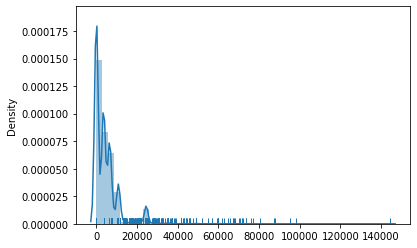

In [9]:
sns.distplot(df[['ve']], hist=True, rug=True)

plt.show()

In [10]:
df2['ve'] = (df2['ve']-df2['ve'].min()+1) .transform(np.log)

<ipython-input-10-c84c22c15d5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ve'] = (df2['ve']-df2['ve'].min()+1) .transform(np.log)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


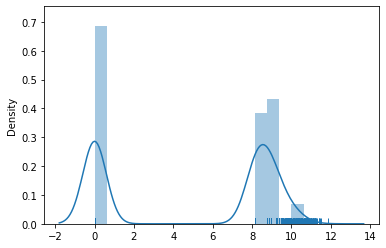

In [11]:
sns.distplot(df2[['ve']], hist=True, rug=True)

plt.show()

In [12]:
#Capping the outlier rows with Percentiles
upper_lim = df2['ve'].quantile(.95)
lower_lim = df2['ve'].quantile(.05)
df2.loc[(df2['ve'] > upper_lim),'ve'] = upper_lim
df2.loc[(df2['ve'] < lower_lim),'ve'] = lower_lim

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Aplicando la normalización para todo el conjunto de datos:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcffd685af0>,
      dtype=object)

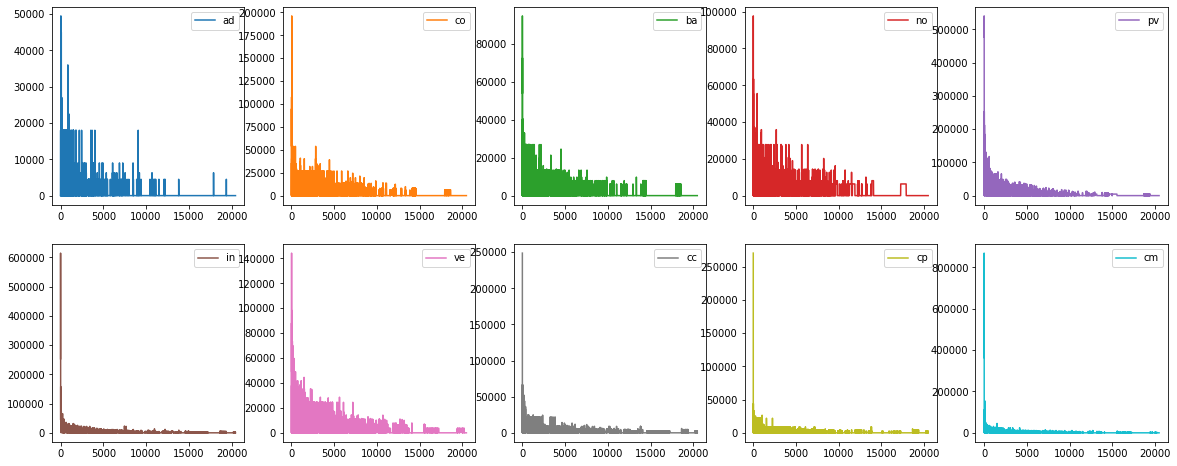

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=5)
fig.set_size_inches(20,8)
df.iloc[: , 4:-1].plot(subplots=True, ax=axes)

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

for c in [c for c in df3.columns if df3[c].dtype in numerics]:
    df3[c] = (df3[c]-df3[c].min()+1) .transform(np.log)
    upper_lim = df3[c].quantile(.95)
    lower_lim = df3[c].quantile(.05)
    df3.loc[(df3[c] > upper_lim),c] = upper_lim
    df3.loc[(df3[c] < lower_lim),c] = lower_lim

<ipython-input-14-601e83af96cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[c] = (df3[c]-df3[c].min()+1) .transform(np.log)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcff8941cd0>,
      dtype=object)

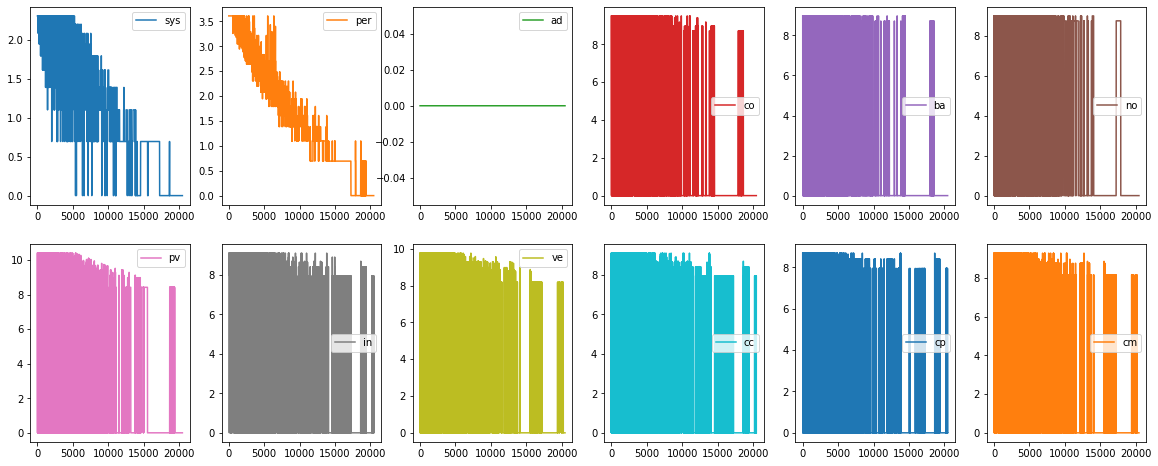

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=6)
fig.set_size_inches(20,8)
df3.plot(subplots=True, ax=axes)

Elbow Plot para determinar el número óptimo de centroides

In [16]:
#Por cada valor de k, se inicializa k_means y se usa la inercia calculada para identificar la suma del cuadrado de las distancias como puntos cercanos entre centroides
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(df3)
    sum_of_squared_distances.append(k_means.inertia_)

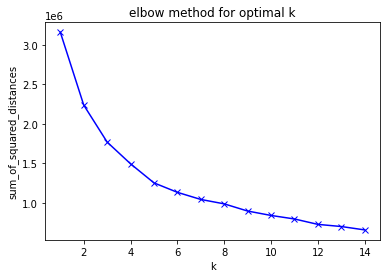

In [17]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

Calculando el coeficiente Silhouette y su puntaje para 4 centroides:

In [18]:
k_means_4 = KMeans(n_clusters=4)
model = k_means_4.fit(df3)
y_hat_4 = k_means_4.predict(df3)
labels_4 = k_means_4.labels_
silhouette_4 = metrics.silhouette_score(df3, labels_4, metric = 'euclidean')
score_4 = metrics.calinski_harabasz_score(df3, labels_4)
print(f'silhouette: ', silhouette_4, ', socre: ', score_4)

silhouette:  0.3236605220568666 , socre:  7591.251222988002


Calculando el coeficiente Silhouette y su puntaje para 5 centroides:

In [19]:
k_means_5 = KMeans(n_clusters=5)
model = k_means_5.fit(df3)
y_hat_5 = k_means_5.predict(df3)
labels_5 = k_means_5.labels_
silhouette_5 = metrics.silhouette_score(df3, labels_5, metric = 'euclidean')
score_5 = metrics.calinski_harabasz_score(df3, labels_5)
print(f'silhouette: ', silhouette_5, ', socre: ', score_5)

silhouette:  0.3484707370839082 , socre:  7770.296332093927


Calculando el coeficiente Silhouette y su puntaje para 6 centroides:

In [20]:
k_means_6 = KMeans(n_clusters=6)
model = k_means_6.fit(df3)
y_hat_6 = k_means_6.predict(df3)
labels_6 = k_means_6.labels_
silhouette_6 = metrics.silhouette_score(df3, labels_6, metric = 'euclidean')
score_6 = metrics.calinski_harabasz_score(df3, labels_6)
print(f'silhouette: ', silhouette_6, ', socre: ', score_6)

silhouette:  0.3613983334848565 , socre:  7301.833431301251


K Means Clustering

In [21]:
df.columns

Index(['year', 'sys', 'fis', 'per', 'ad', 'co', 'ba', 'no', 'pv', 'in', 've',
       'cc', 'cp', 'cm', 'value'],
      dtype='object')

In [22]:
cols_of_interest = ['sys', 'per', 'ad', 'co', 'ba', 'no', 'pv', 'in', 've',
       'cc', 'cp', 'cm']

In [23]:
relevant_df = df[cols_of_interest]

In [24]:
#X = StandardScaler().fit_transform(df3)
X = df3
X

,sys,per,ad,co,ba,no,pv,in,ve,cc,cp,cm
0,2.302585,3.610918,0.0,9.506065,8.974745,9.002209,10.394549,9.105091,9.759097,9.105091,8.69467,9.292934
1,2.302585,3.610918,0.0,0.000000,0.000000,0.000000,0.000000,9.105091,0.000000,0.000000,0.00000,9.292934
2,2.302585,3.610918,0.0,0.000000,8.974745,0.000000,10.394549,9.105091,9.759097,9.105091,8.69467,9.292934
3,2.302585,3.610918,0.0,9.506065,8.974745,9.002209,10.394549,9.105091,9.759097,9.105091,8.69467,9.292934
4,2.302585,3.610918,0.0,9.506065,8.974745,9.002209,10.394549,9.105091,9.759097,9.105091,8.69467,9.292934
...,...,...,...,...,...,...,...,...,...,...,...,...
20463,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.955425,0.000000,0.000000,0.00000,0.000000
20464,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.955425,0.000000,0.000000,0.00000,0.000000
20465,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.955425,0.00000,0.000000
20466,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.955425,0.000000,0.000000,0.00000,0.000000


Entrenamiento del modelo KMeans

In [25]:
kmeans = KMeans(n_clusters=5)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(n_clusters=5)


In [26]:
centers = model.cluster_centers_


In [27]:
# Función para crear un dataframe con los resultados

def pd_centers(cols_of_interest, centers):
        colNames = list(cols_of_interest)
        colNames.append('prediction')
# Zip with a column called 'prediction' (index)
        Z = [np.append(A, index) for index, A in enumerate(centers)]
# Convert to pandas data frame for plotting
        P = pd.DataFrame(Z, columns=colNames)
        P['prediction'] = P['prediction'].astype(int)
        return P


In [28]:
# Función para crear gráficas

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([0,10])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [29]:
P = pd_centers(cols_of_interest, centers)
P

,sys,per,ad,co,ba,no,pv,in,ve,cc,cp,cm,prediction
0,1.726812,2.442622,0.0,0.690242,0.618586,0.871664,4.826089,8.159415,7.465501,7.719270,6.278330,8.507097,0
1,0.833993,1.204166,0.0,0.179332,0.047677,0.196121,8.408082,6.238572,0.715963,1.966663,0.260604,1.575614,1
2,0.351692,0.749988,0.0,5.884022,0.826059,5.016584,0.100497,0.150431,0.653480,0.175245,0.478472,0.202187,2
3,0.813955,1.062634,0.0,1.678903,0.333716,2.166367,0.246268,1.340037,8.186363,6.265438,0.313806,0.088521,3
4,2.080653,3.049998,0.0,8.935921,7.940077,7.473075,3.773059,7.627884,8.507079,8.279552,7.921785,7.987407,4


PV

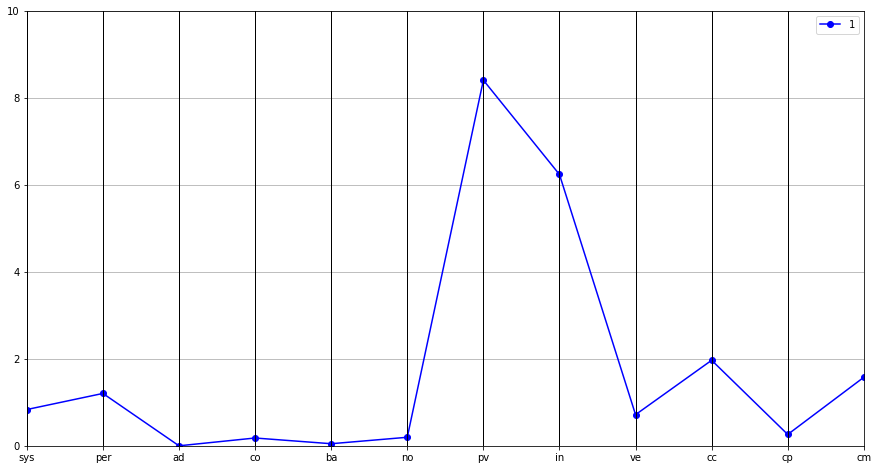

In [30]:
parallel_plot(P[P['pv'] > 5])

NO

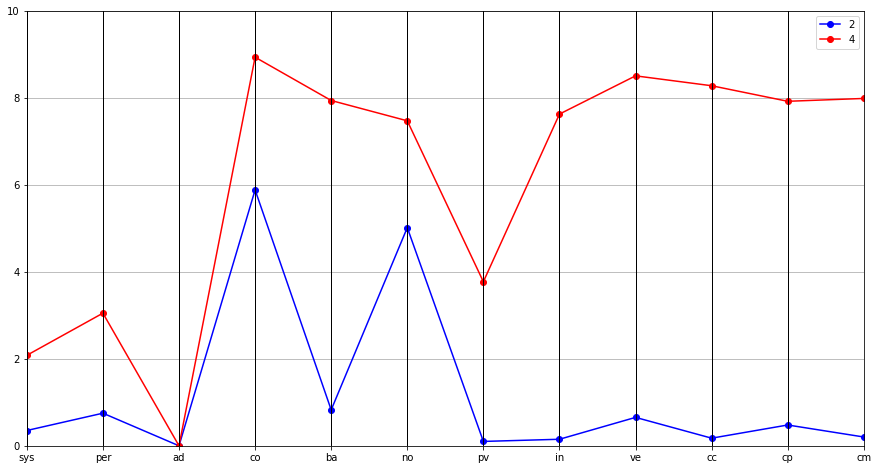

In [31]:
parallel_plot(P[P['no'] > 5])

VE

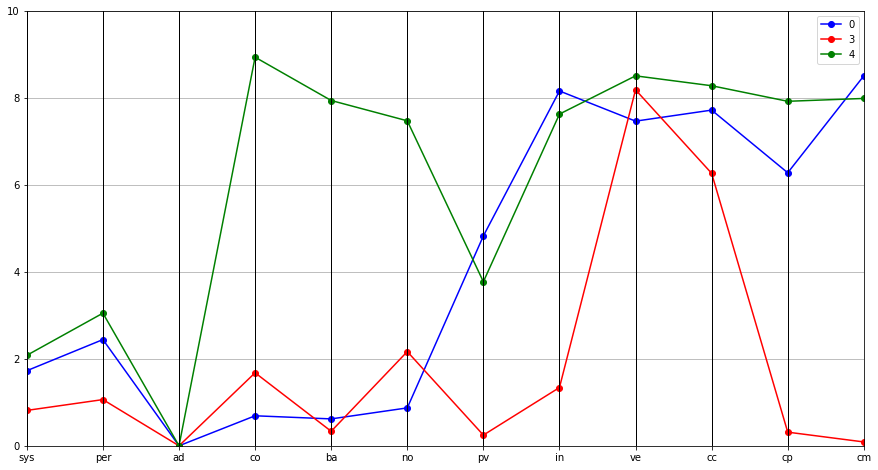

In [32]:
parallel_plot(P[P['ve'] > 5])

No le interesa el PV

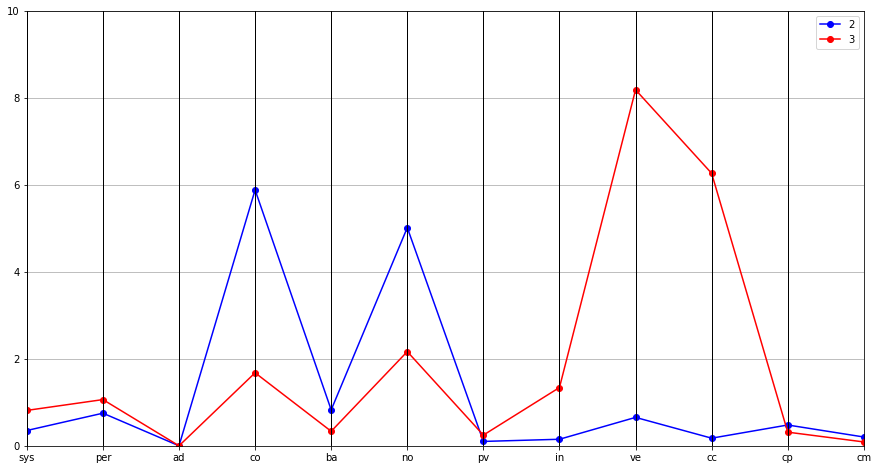

In [33]:
parallel_plot(P[P['pv'] < 2])

Mostrando todos los grupos y su comportamiento

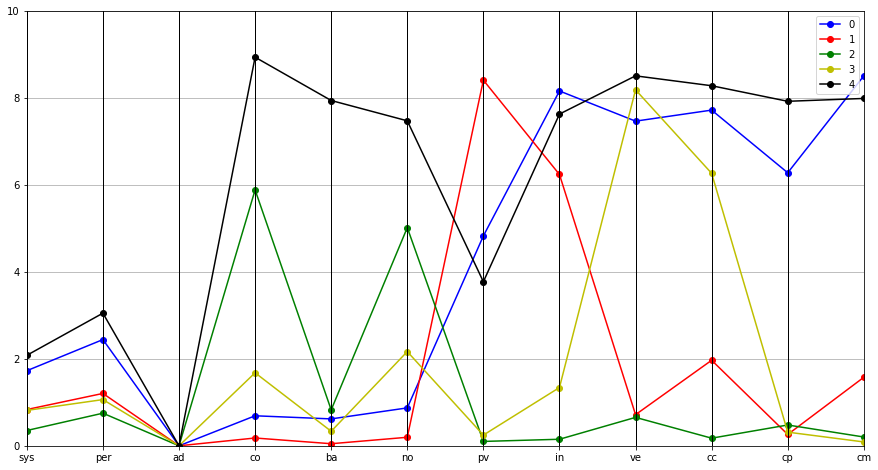

In [34]:
parallel_plot(P[P['in'] < 30.0])

Creando un Radar Chart para visualizar las características de un grupo

In [35]:
list(P)[0:-1]

['sys', 'per', 'ad', 'co', 'ba', 'no', 'pv', 'in', 've', 'cc', 'cp', 'cm']

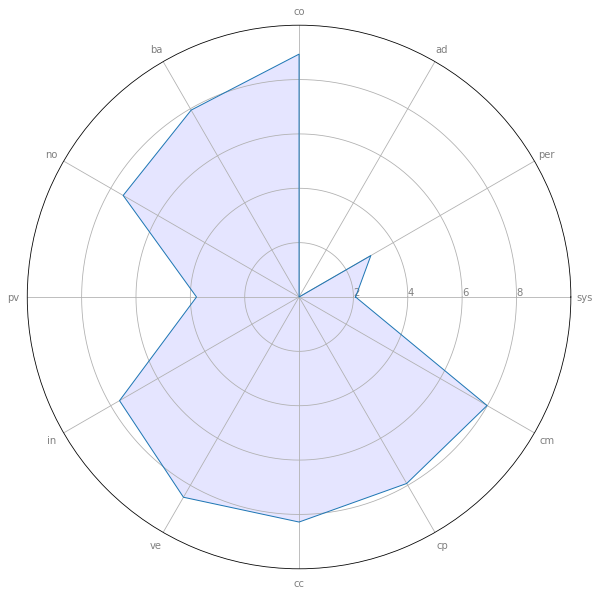

In [47]:
# number of variable
categories=list(P)[0:-1]
N = len(categories)
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=P.loc[4].drop('prediction').values.flatten().tolist()
values += values[:1]
values
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=10)
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([2, 4, 6,8], ["2","4","6","8"], color="grey", size=10)
plt.ylim(0,10)
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)
#Size
plt.rcParams["figure.figsize"] = (20,10)

# Show the graph
plt.show()

Una vez que se tienen los resultados, se aplica el modelo al conjunto de datos completo para obtener la clasificación final.





In [37]:
kmeans.labels_

array([4, 1, 0, ..., 3, 1, 2], dtype=int32)

In [38]:
ClassifiedData = df
ClassifiedData['cluster'] = kmeans.labels_

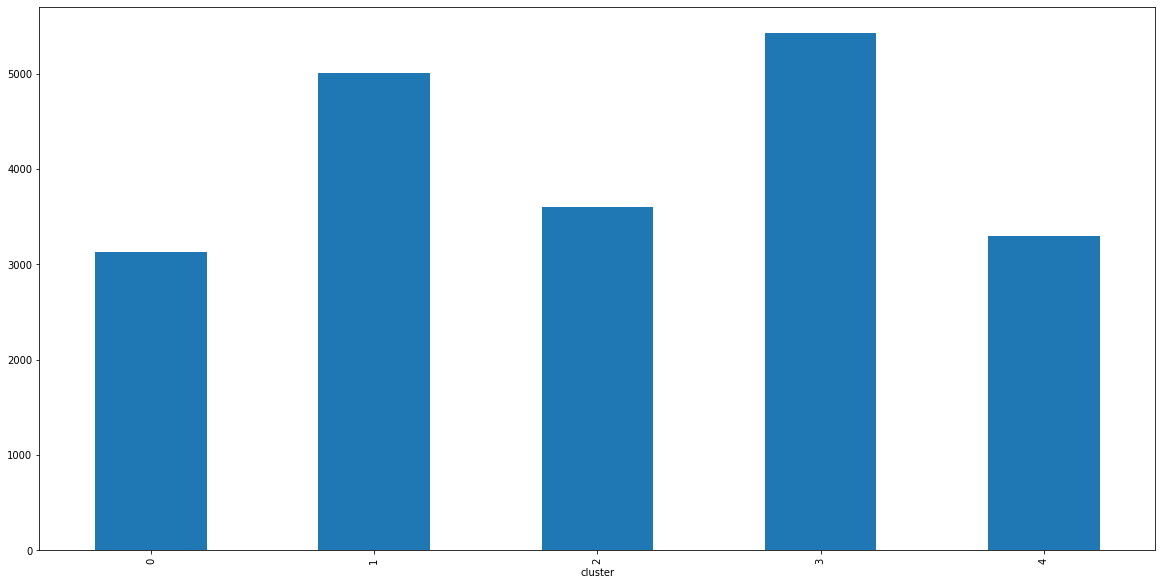

In [48]:
ClassifiedData.groupby('cluster')['cluster'].count().plot.bar(x='cluster')

Generando información necesaria para documento los ejemplos y resultados

In [40]:
ClassifiedData.groupby('cluster').agg({'value': ['sum','count']}).to_csv('clusters.csv', header=False, index=True)

In [41]:
P.to_csv("P.csv")

In [42]:
ClassifiedData.to_csv('classified_data.csv')

In [43]:
# 3: 'Mayorista'
# 0: 'Administrativo' 
# 1: 'Empresa'
# 4: 'Tienda'
# 2: 'Distribuidor'